In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path 
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from csv import reader
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [4]:
stars = pd.read_csv('C:/Users/Hazem Elseify/Downloads/6 class csv.csv')
X = stars[['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)', 'Absolute magnitude(Mv)']]
y = stars[['Star type']]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [6]:
param_grid={'C':[0.1,1,10,100],'gamma':[0.0001,0.001,0.1,1],'kernel':['rbf','poly']}
svc=svm.SVC(probability=True)
model=GridSearchCV(svc,param_grid)

In [7]:
y_train=np.ravel(y_train)
r=model.fit(X_train,y_train)
print('The Model is trained well with the given images')
print(model.best_params_)

The Model is trained well with the given images
{'C': 1, 'gamma': 1, 'kernel': 'poly'}


In [8]:
y_pred=model.predict(X_test)
print("The predicted Data is :")
print(y_pred)
print("The actual data is:")
print(f"The model is {accuracy_score(y_pred,y_test)*100}% accurate")

The predicted Data is :
[3 2 0 3 2 0 4 3 2 2 1 2 1 2 4 5 0 5 1 0 2 0 2 4 3 3 3 3 0 5 2 5 4 0 1 3 4
 4 4 5 3 5 0 2 1 5 3 1 4 4 1 2 0 2 1 4 0 2 0 2 2 4 1 3 0 5 1 2 4 4 4 3 5 5
 1 5 4 2 5 0]
The actual data is:
The model is 98.75% accurate


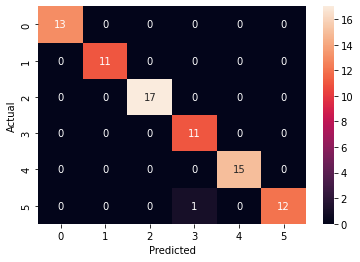

In [9]:
import seaborn as sn
y_testnew=[]
y_test=y_test.to_numpy()
y_test=y_test.tolist()
for i in y_test:
    for j in i:
        y_testnew.append(j)   
y_pred=model.predict(X_test)
y_actu = pd.Series(y_testnew, name='Actual')
y_pred = pd.Series(y_pred,name='Predicted')
df_confusion = pd.crosstab(y_actu, y_pred)
sn.heatmap(df_confusion, annot=True)
plt.show()